#### Comme promis nous voici sur Jupyter ... Notebook ! 

####  Vous allez pouvoir découvrir le premier cas pratique à travers ce notebook, vous pouvez naviguer à travers ce notebook en cliquant sur les parties annoncées dans le sommaire (en bleu). Pour pouvoir exécuter une ligne de code, vous pourrez appuyer sur le bouton suivant (ou CRTL + ENTER) :

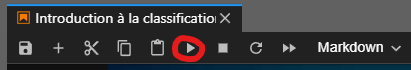

#### Ici, en cliquant sur le symbole "+" vous pourrez créer une nouvelle cellule et pouvoir écrire votre propre ligne de code : 

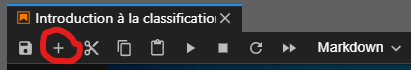

#### Vous pouvez essayer directement sur le notebook 

- 1) en cliquant sur le symbole "+" 

- 2) en entrant la commande suivante :    print("Hello world !") 
 
- 3) suivie de CTRL + ENTER


In [1]:
print("Hello world !")

Hello world !


#### Si vous souhaitez relancer le notebook (réexécuter le code par exemple) vous pouvez appuyer sur ce bouton :

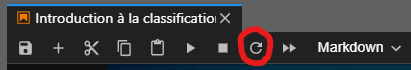

## Apprendre à notre robot à ranger une armoire : Sommaire : 

### [I) Import des librairies & des données](#I)
### [II) Description & traitement des données ](#II)
### [III) Application du modèle](#III)
### [IV) Prédiction](#IV)



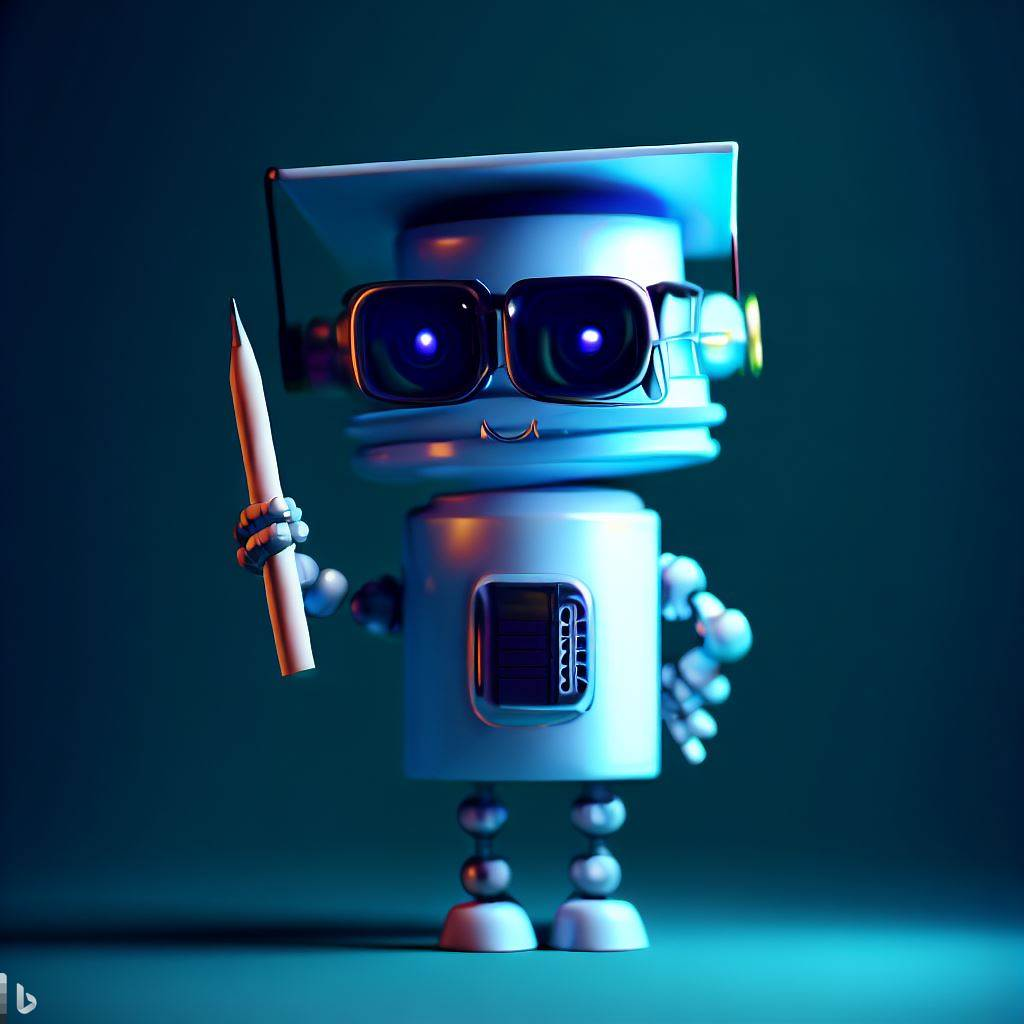

# <a id='I'> I) Import des librairies & des données </a> 



#### Ici on va importer la librairie Scikit-learn, une librairie qui permet d'accèder à un panel complet d'algorithme de machine learning et de traitement des données. $\;\;\;\;\;\;$ &nbsp;
#### On va donc importer les modules qui nous intéressent comme l'algorithme de classification grâce à la commande : from sklearn.naive_bayes import MultinomialNB

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd 

#### On peut comparer une librairie en programmation à une vraie librairie où l'on va choisir un livre (un module ou une fonction) adapté à notre problématique !

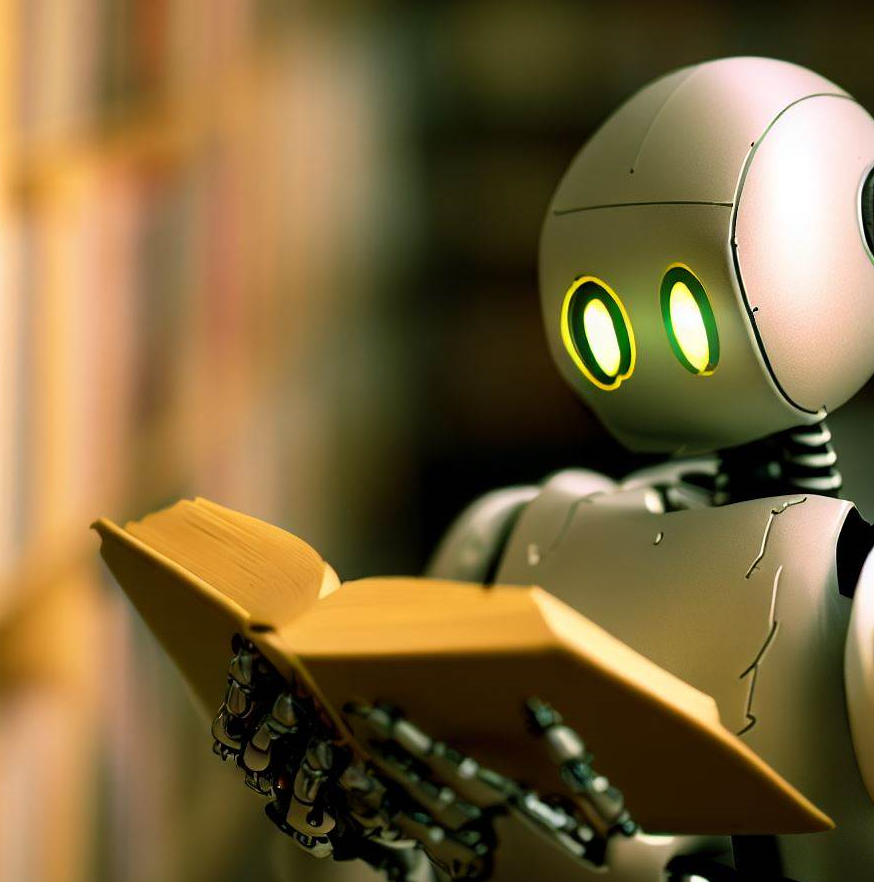

### L'étape suivante est d'importer un fichier csv contenant nos données : 

In [14]:
df = pd.read_csv("data.csv", sep=",") # ici pd correspond à l'appelation de la librairie "pandas" une librairie permettant la manipulation de base de donnée 

# <a id='II'> II) Description & traitement des données </a> 

In [15]:
df # voici notre dataframe 

,Date,Mes vêtements,Pile de vêtement associé
0,2022-02-05,chino gris,pile des pantalons
1,2022-02-05,t-shirt rouge,pile des t-shirts
2,2022-03-05,parka gris,pile des vestes / manteaux
3,2022-03-05,cravate vert,pile des accessoires
4,2022-04-05,cravate noir,pile des accessoires
...,...,...,...
495,2023-04-01,t-shirt orange,pile des t-shirts
496,2023-05-01,chaussette rouge,pile des accessoires
497,2023-05-01,doudoune jaune,pile des vestes / manteaux
498,2023-06-01,cravate blanc,pile des accessoires


#### Nous pouvons voir ici notre base de donnée (dataframe) composé de 500 lignes (500 observations) pour 3 colonnes, comme expliqué dans la partie précédente on se servira uniquement de la colonne "Mes vêtements" (X) et de "Pile de vêtement associé" (Y), ici X est déjà labellisé, par exemple :

- on sait qu'un chino gris (X1) va dans la pile des pantalons (Y1)
- on sait qu'un t-shirt rouge (X2) va dans la pile des t-shirts (Y2)

#### On va donc décomposer dans la prochaine étape notre dataframe entre X et Y puis fragmenter en deux notre base de donnée entre une base de donnée d'entraînement (75% de données). Cette base de donnée d'entraînement va servir à l'apprentissage de notre algorithme puis les 25% restantes vont servir au test de notre algorithme (notre algorithme va donc devoir lui-même labellisé les vêtements à partir de ce qu'il a appris avec la base de donnée d'entraînement. 

# <a id='III'> III) Application du modèle </a> 

In [16]:
X = df['Mes vêtements']
y = df['Pile de vêtement associé']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [19]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)

MultinomialNB()

In [21]:
y_pred = naive_bayes.predict(X_test_vec)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle:", accuracy)

Précision du modèle: 1.0


# <a id='IV'> IV) Prédiction </a> 

In [43]:
# Demandez à l'utilisateur d'entrer un vêtement
new_clothing = input("Entrez un vêtement : ")

# Transformez le nouveau vêtement en vecteur numérique à l'aide du même transformateur CountVectorizer
new_clothing_vec = vectorizer.transform([new_clothing])

# Faites une prédiction sur le nouveau vêtement
prediction = naive_bayes.predict(new_clothing_vec)

print(f"Prédiction : le  '{new_clothing}' doit être rangé dans la '{prediction[0]}'")

Entrez un vêtement :  pantalon magentra


Prédiction : le  'pantalon magentra' doit être rangé dans la 'pile des pantalons'
